<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/UNT-CSE-SpaceshipTitanic/blob/main-machine-learning/Spaceship_notebook_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages, libraries
import pandas as pd
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots



from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from google.colab import drive

In [49]:

### Connect with google drive
def connect_and_fetch_train():

  drive.mount('/content/drive')

  ### Train & Test csv dir

  train_file = "1aFLIETCp08ZRwvYj29MPeHokzltUywhv"
  test_file = "1wB9wtBDqedOlLeVfnaMY0b_oTXmu3rg4"


  train_dir = f'https://drive.google.com/uc?id={train_file}'
  return train_dir

def connect_and_fetch_test():
  drive.mount('/content/drive')

  ### Train & Test csv dir

  test_file = "1wB9wtBDqedOlLeVfnaMY0b_oTXmu3rg4"


  test_dir = f'https://drive.google.com/uc?id={test_file}'
  return test_dir



In [79]:
df_train = pd.read_csv(connect_and_fetch_train())
df_test = pd.read_csv(connect_and_fetch_test())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Data Visualization

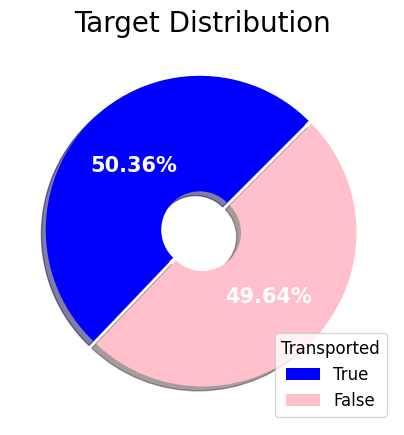

In [80]:
fig, ax = plt.subplots(figsize=(5,5))

labels = df_train["Transported"].value_counts().index
lst = df_train["Transported"].value_counts().to_list()
pie = ax.pie(lst, labels = labels, autopct='%.2f%%', textprops=dict(color="white", fontsize=15, weight="bold"), colors=["blue", "pink"], shadow=True, wedgeprops=dict(width=0.75), startangle=45, explode=(0.025,0))

ax.set_title("Target Distribution", size=20)
ax.legend(title="Transported", title_fontsize=12, loc='best', fontsize=12)
plt.show()

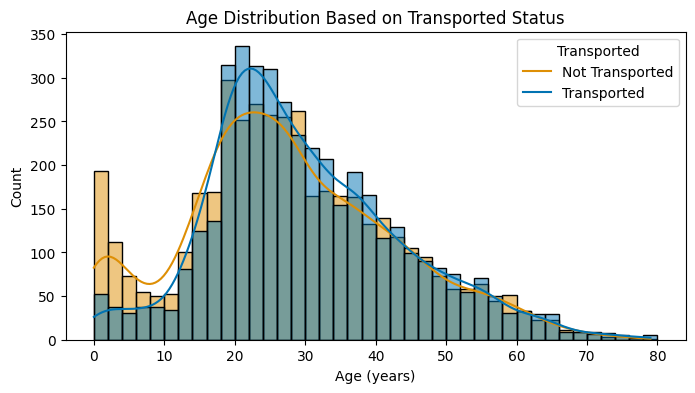

In [81]:
# Figure size
plt.figure(figsize=(8, 4))

# Histogram with custom colors
sns.histplot(data=df_train, x='Age', hue='Transported', binwidth=2, kde=True, palette='colorblind')

# Plot title and labels
plt.title('Age Distribution Based on Transported Status')
plt.xlabel('Age (years)')

# Legend labels
legend_labels = ['Not Transported', 'Transported']
plt.legend(title='Transported', labels=legend_labels)

# Show the plot
plt.show()

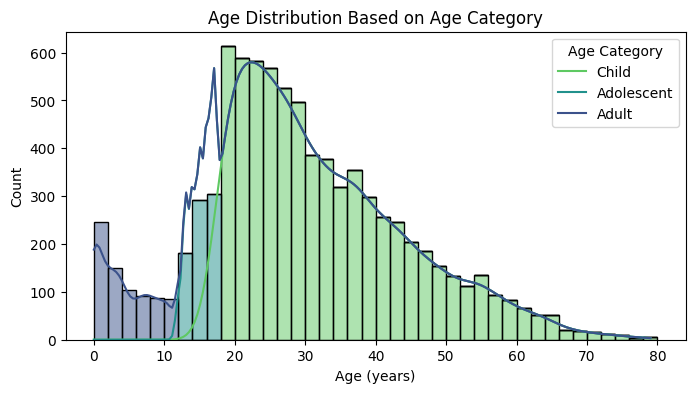

In [82]:
#'Age' is the column in DataFrame
df_train['Age_Category'] = pd.cut(df_train['Age'], bins=[0, 12, 18, float('inf')], labels=['Child', 'Adolescent', 'Adult'], right=False)

# Figure size
plt.figure(figsize=(8, 4))

# Histogram with custom colors
sns.histplot(data=df_train, x='Age', hue='Age_Category', binwidth=2, kde=True, multiple='stack', palette='viridis')

# title and labels
plt.title('Age Distribution Based on Age Category')
plt.xlabel('Age (years)')

# Legend labels
legend_labels = ['Child', 'Adolescent', 'Adult']
plt.legend(title='Age Category', labels=legend_labels)

# Show the plot
plt.show()

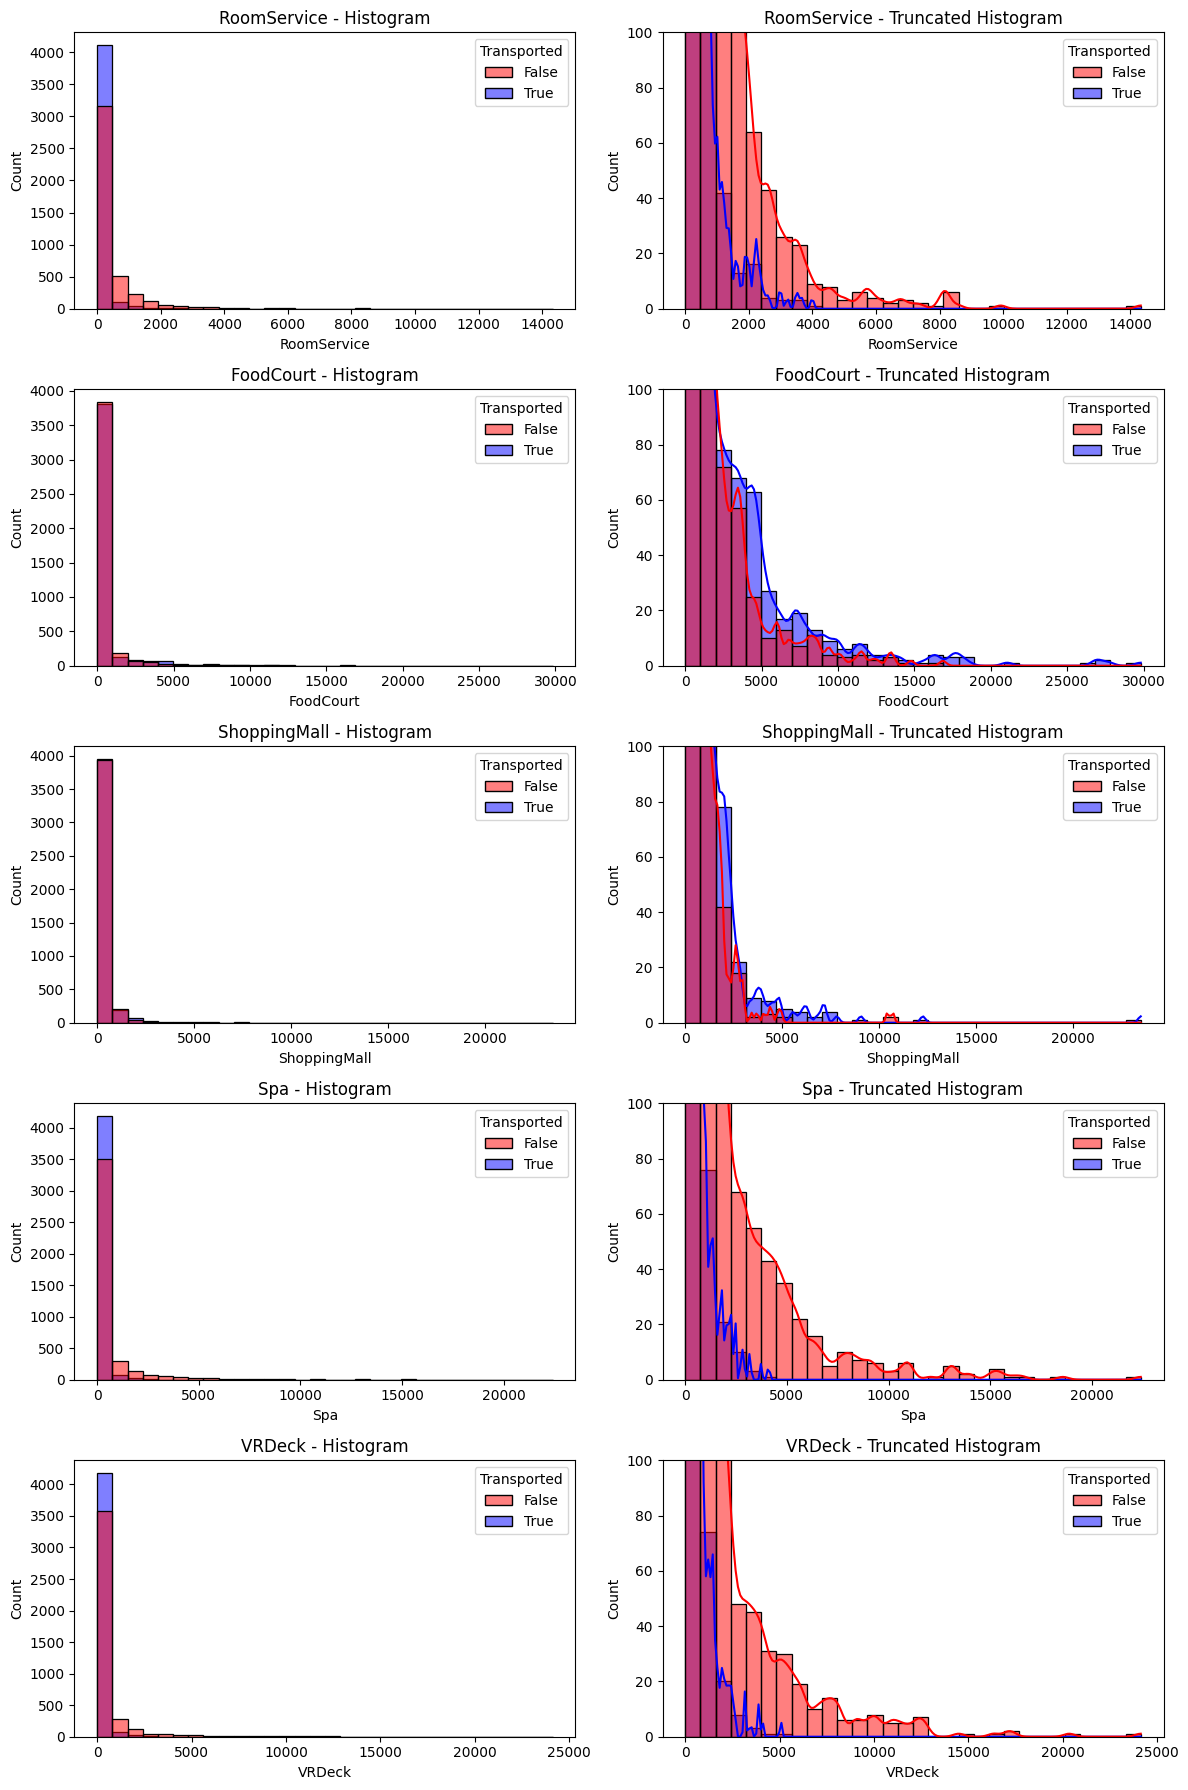

In [83]:
# Expenditure features
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Create a plot
plt.figure(figsize=(12, 18))

# Define custom colors
custom_palette = ['red', 'blue']

for i, var_name in enumerate(exp_feats):
    # Create the left plot
    plt.subplot(5, 2, 2 * i + 1)

    # Plot a histogram with custom colors
    sns.histplot(data=df_train, x=var_name, bins=30, kde=False, hue='Transported', palette=custom_palette)

    # Set title
    plt.title(f'{var_name} - Histogram')

    # Create the right plot (truncated)
    plt.subplot(5, 2, 2 * i + 2)

    # Plot a truncated histogram with KDE and custom colors
    sns.histplot(data=df_train, x=var_name, bins=30, kde=True, hue='Transported', palette=custom_palette)

    # Set y-axis limit
    plt.ylim([0, 100])

    # Set title
    plt.title(f'{var_name} - Truncated Histogram')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

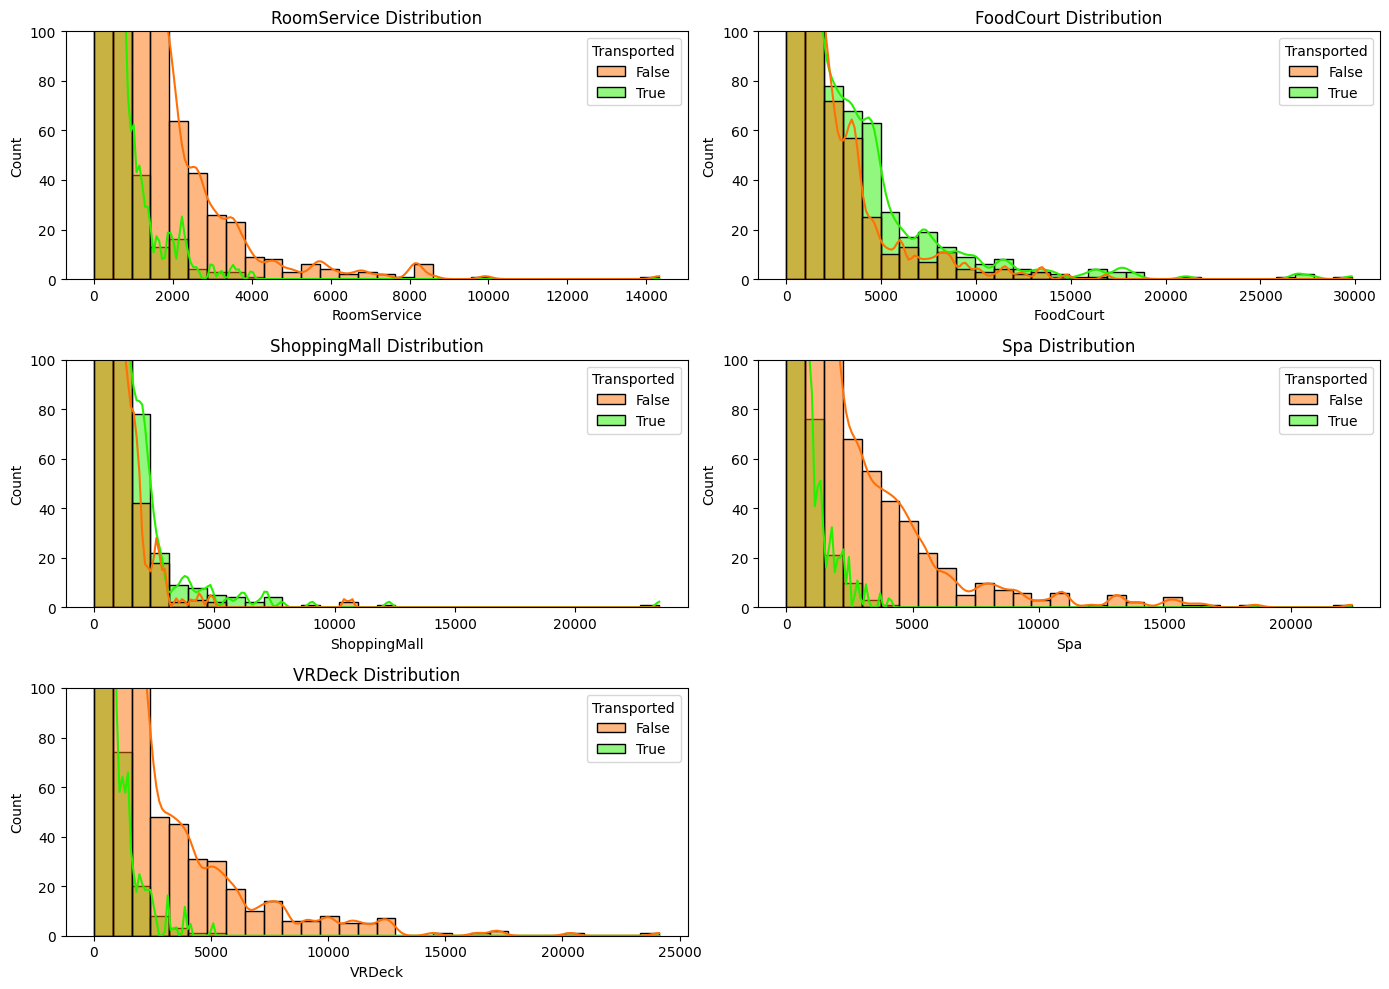

In [84]:
# Specify the columns of interest
exp_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

# Set the figure size
plt.figure(figsize=(14, 10))

# Iterate over columns and create subplots
for idx, column in enumerate(exp_cols):
    plt.subplot(3, 2, idx + 1)

    # histogram with seaborn
    sns.histplot(x=column, hue="Transported", data=df_train, bins=30, kde=True, palette="gist_ncar_r")

    # Add title and adjust layout
    plt.title(f"{column} Distribution")
    plt.ylim(0, 100)
    plt.tight_layout()

# Show the plot
plt.show()

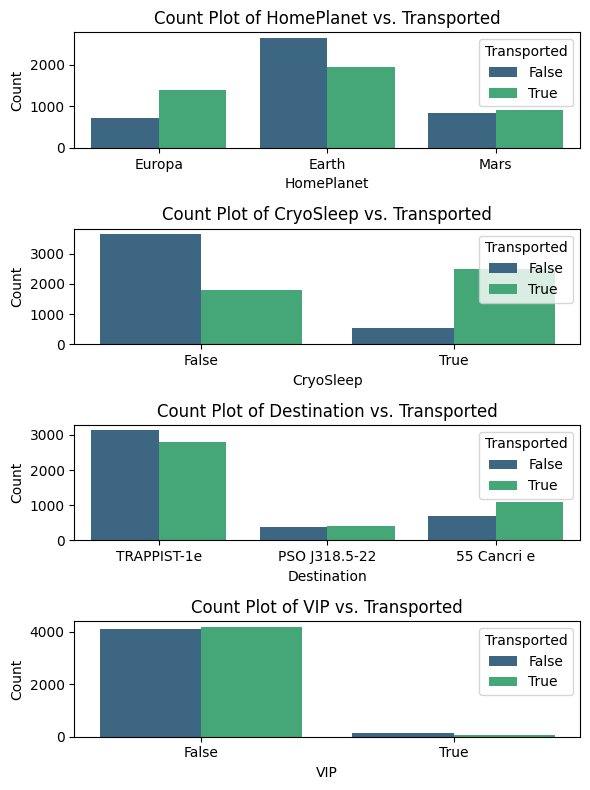

In [85]:
# Categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(6, 8))

for i, feature in enumerate(categorical_features):
    ax = axes[i]
    sns.countplot(data=df_train, x=feature, ax=ax, hue='Transported', palette='viridis')
    ax.set_ylabel('Count')
    ax.set_title(f'Count Plot of {feature} vs. Transported')
# show plot
fig.tight_layout()
plt.show()

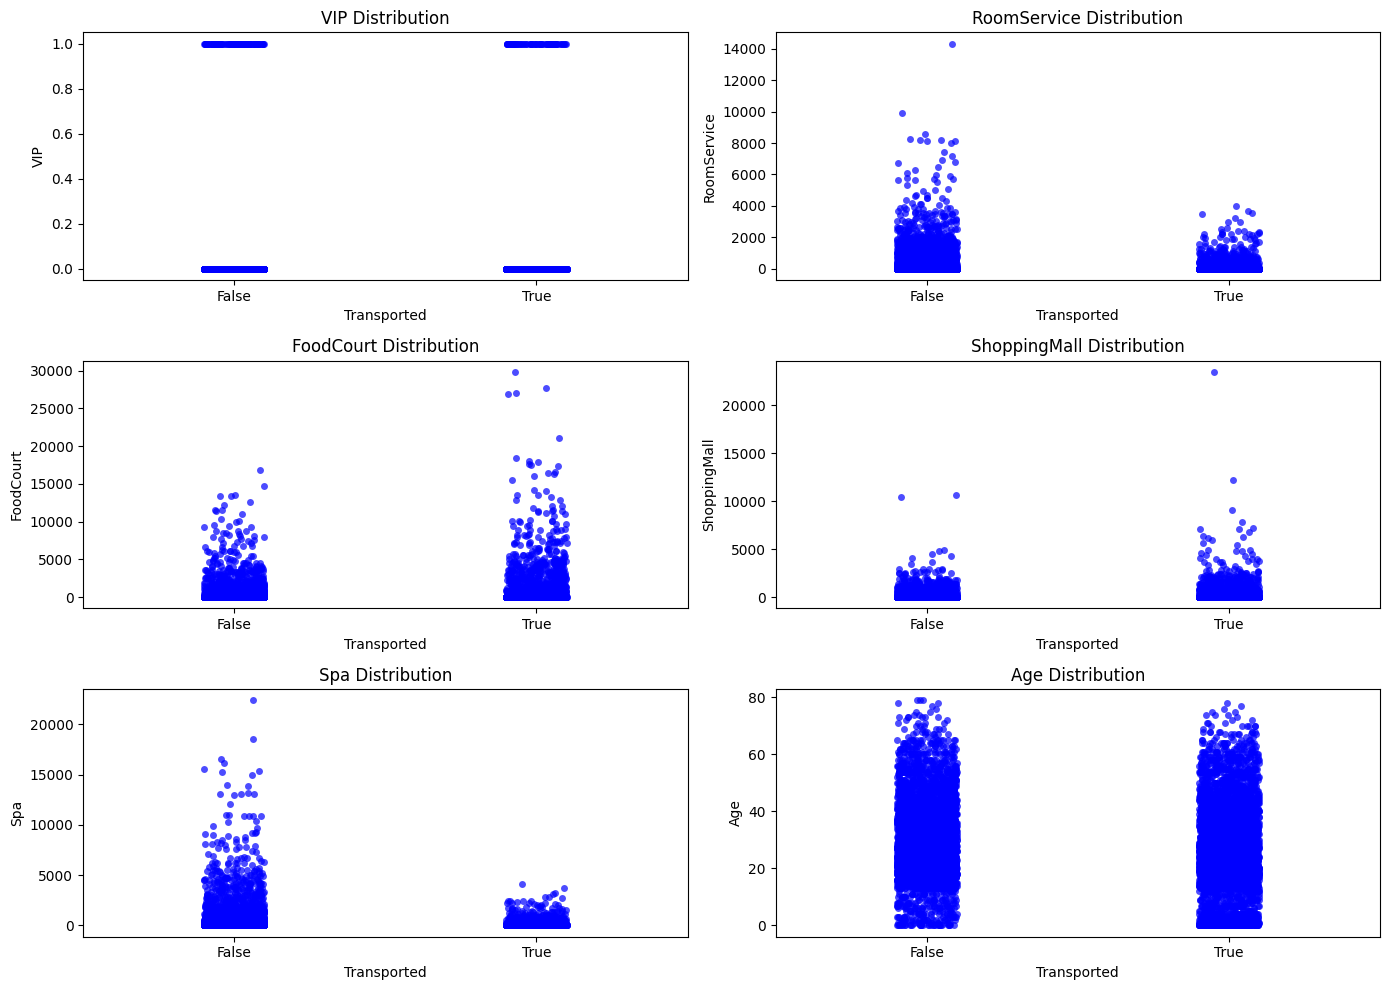

In [86]:
# Selecting relevant columns for the dot plot
dot_plot_cols = ['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'Age']

# Set the figure size
plt.figure(figsize=(14, 10))

# Iterate over columns and create subplots
for idx, column in enumerate(dot_plot_cols, 1):
    plt.subplot(3, 2, idx)

    # Create a dot plot with seaborn
    sns.stripplot(x='Transported', y=column, data=df_train, jitter=True, color='blue', alpha=0.7)

    # Add title and adjust layout
    plt.title(f'{column} Distribution')
    plt.tight_layout()

# Show the plot
plt.show()

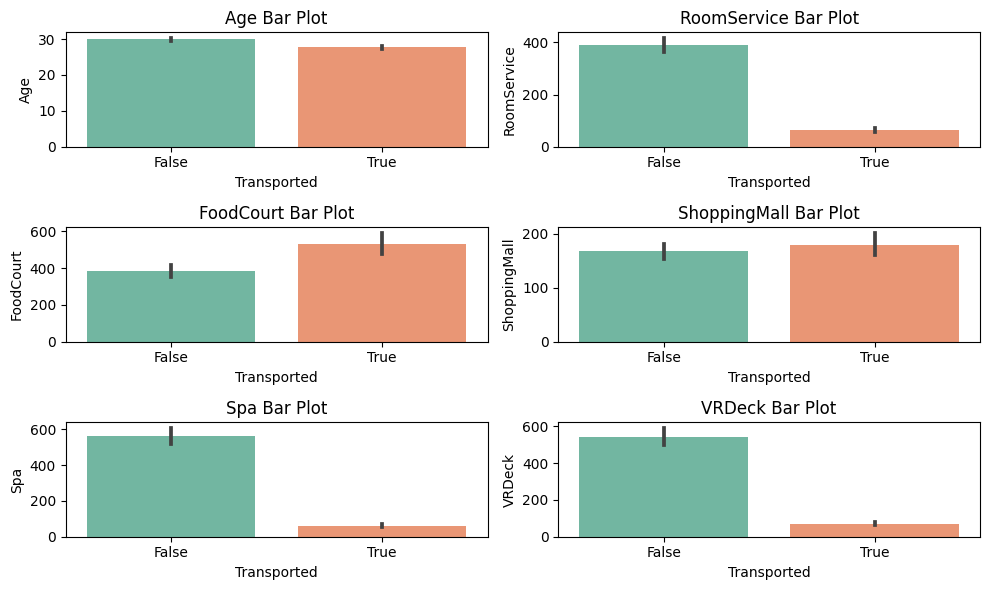

In [87]:
# Selecting numerical features
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate over numerical features and create bar plots
for idx, column in enumerate(numerical_features, 1):
    plt.subplot(3, 2, idx)

    # Create a bar plot with seaborn
    sns.barplot(x='Transported', y=column, data=df_train, palette="Set2")

    # Add title and adjust layout
    plt.title(f"{column} Bar Plot")
    plt.tight_layout()

# Show the plot
plt.show()


# Preprocessing


In [88]:
def split_cabin(df):
  df[['deck','num','side']]=df['Cabin'].str.split('/',expand=True)

  return df

df_train = split_cabin(df_train)
df_test = split_cabin(df_test)


In [89]:
label_cols = ["HomePlanet", "CryoSleep","deck","side", "Destination" ,"VIP"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train ,test = label_encoder(df_train,df_test ,label_cols)

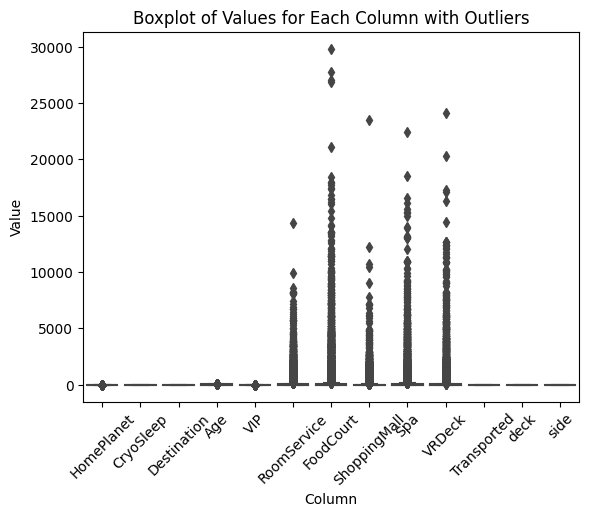

In [90]:
sns.boxplot(data=df_train, fliersize=5)  # Set fliersize to highlight outliers
plt.title('Boxplot of Values for Each Column with Outliers')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [91]:
def preprocessing_missing_value(df):
  df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
  df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
  df['RoomService'].fillna(df['RoomService'].min(), inplace=True)
  df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)
  df['VIP'].fillna(df['VIP'].mode()[0],inplace = True)
  df['Age'].fillna(df['Age'].mode()[0],inplace = True)
  df['Spa'].fillna(df['Spa'].mean(), inplace = True)
  df['Cabin'].fillna(df['Cabin'].mode(), inplace = True)
  df['VRDeck'].fillna(df['VRDeck'].median(), inplace = True)
  df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace = True)
  df['HomePlanet'].fillna(df['HomePlanet'].mode()[0],inplace = True)
  df['deck'].fillna(df['deck'].mode()[0],inplace = True)
  df['side'].fillna(df['side'].mode()[0],inplace = True)
  df['num'].fillna(df['num'].median(), inplace = True)
  df['num'] = df['num'].astype('int')
  return df

df_train = preprocessing_missing_value(df_train)
df_test = preprocessing_missing_value(df_test)


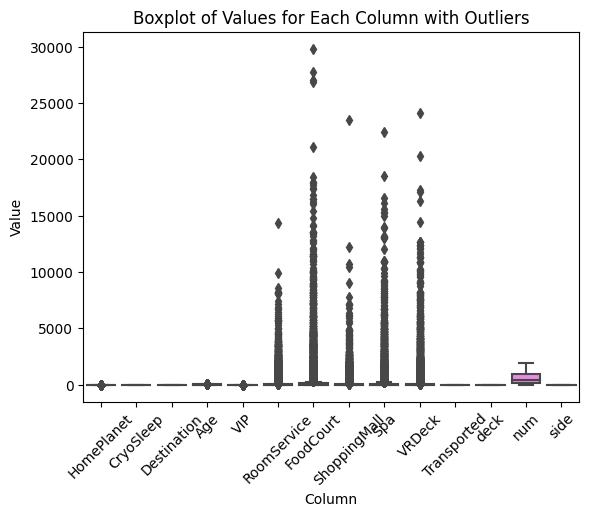

In [92]:
sns.boxplot(data=df_train, fliersize=5)  # Set fliersize to highlight outliers
plt.title('Boxplot of Values for Each Column with Outliers')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Feature Engineering


In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scr=StandardScaler()
minn=MinMaxScaler()


def scaling(df):
  df["FoodCourt"]= minn.fit_transform(df[["FoodCourt"]])
  df["RoomService"]= minn.fit_transform(df[["RoomService"]])
  df["ShoppingMall"]= minn.fit_transform(df[["ShoppingMall"]])
  df["Spa"]= minn.fit_transform(df[["Spa"]])
  df["Age"]= minn.fit_transform(df[["Age"]])
  df["VRDeck"]= minn.fit_transform(df[["VRDeck"]])
  df["num"]= scr.fit_transform(df[["num"]])

  return df
df_train = scaling(df_train)
df_test = scaling(df_test)
# add new row


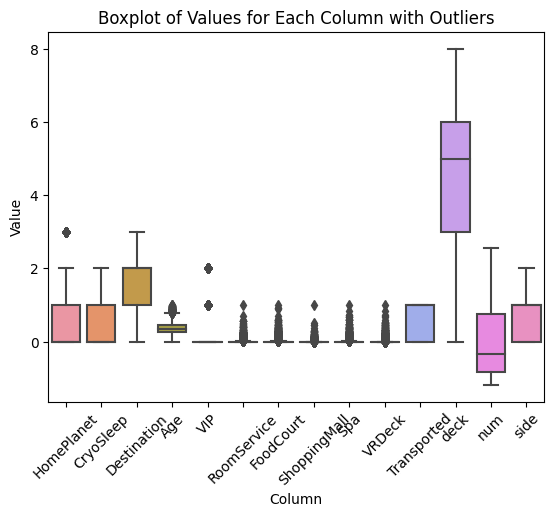

In [94]:
sns.boxplot(data=df_train, fliersize=5)  # Set fliersize to highlight outliers
plt.title('Boxplot of Values for Each Column with Outliers')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

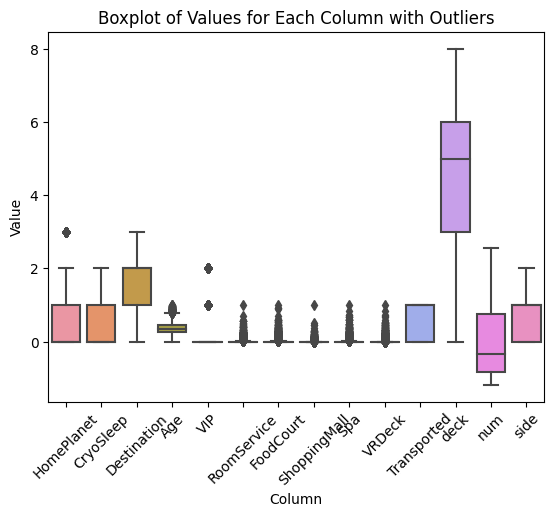

In [95]:

#plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, fliersize=5)  # Set fliersize to highlight outliers
plt.title('Boxplot of Values for Each Column with Outliers')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [98]:
def clipping_quantile(dataframe, quantile_values = None, quantile = 0.99):
    df = dataframe.copy()
    if quantile_values is None:
        quantile_values = df[["VRDeck",'Age','HomePlanet','VIP']].quantile(quantile)
    for num_column in ["VRDeck",'Age','HomePlanet','VIP']:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values
    return df

df_train = clipping_quantile(df_train, None, 0.99)
df_test = clipping_quantile(df_test, None, 0.99)

In [ ]:
sns.boxplot(data=df_train, fliersize=5)  # Set fliersize to highlight outliers
plt.title('Boxplot of Values for Each Column with Outliers')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Model Selection



In [112]:
# required models
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import AdaBoostClassifier

def split_data(df):
   X = df.drop(columns=['Transported','PassengerId','Cabin','Name','Age_Category'])
   y = df['Transported']
   X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=1,shuffle=True)
   return X_train, X_test, y_train, y_test

def print_confusion_matrix(confusion_matrix):
  f, ax=plt.subplots(figsize=(5,5))
  sns.heatmap(confusion_matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
  plt.xlabel("Predicted Transported")
  plt.ylabel("Actual Transported")
  plt.show()

def train_classifiers(X_train, y_train):
    classifiers = {
        'Naive Bayes': BernoulliNB(),
        'KNN': KNeighborsClassifier(n_jobs=-1),
        'Logistic Regression': LogisticRegression(n_jobs=-1),
        'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=272),
        'Random Forest': RandomForestClassifier(max_depth=11, n_estimators=100, random_state=200),
        'AdaBoost': AdaBoostClassifier(n_estimators=150, random_state=42, learning_rate=1),
        'XGBoost': XGBClassifier(gamma=1.5, subsample=1.0, max_depth=5, colsample_bytree=1.0, n_estimators=150)
    }

    for classifier_name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)

    return classifiers


In [113]:
def models_on_training(X_train, y_train):

    # get pretrained models
    classifiers = train_classifiers(X_train, y_train)


    for name, instance in classifiers.items():
        print(f'============================== {name} Training Model Evaluation ==============================')
        print(f'Cross-validation Mean : {cross_val_score(instance, X_train, y_train, cv=10).mean()}\n')
        print(f'Model Accuracy(Training): {metrics.accuracy_score(y_train, instance.predict(X_train))}\n')
        print(f'Confusion Matrix :\n ')
        print(print_confusion_matrix( metrics.confusion_matrix(y_train, instance.predict(X_train))))
        print(f'Classification report: {metrics.classification_report(y_train, instance.predict(X_train))}\n' )


    return classifiers

def model_performance_in_test(models, X_test, y_test):
  for name, instance in models.items():
    print(f'============================== {name} Model Test Results ==============================')
    print (f'Model Accuracy(Testing): {metrics.accuracy_score(y_test, instance.predict(X_test))}' )
    print(f'Confusion Matrix :\n')
    print_confusion_matrix(metrics.confusion_matrix(y_test, instance.predict(X_test)))
    print(f'Classification report: {metrics.classification_report(y_test, instance.predict(X_test))}\n')

In [114]:
def pipeline(df, df_test):
  X_train, X_test, y_train, y_test = split_data(df)
  models = models_on_training(X_train, y_train)
  model_performance_in_test(models, X_test, y_test)
  model = XGBClassifier(gamma=1.5, subsample=1.0, max_depth=5, colsample_bytree=1.0, n_estimators=150)
  model.fit(X_train, y_train)

  # df_test = df_test.drop(columns=['PassengerId','Cabin','Name'])
  # y_pred = model.predict(df_test)
  # submission_df = create_submission_dataframe(y_pred, test["PassengerId"])


  # # Set Transported to boolean
  # submission_df["Transported"] = submission_df["Transported"].apply(
  #     lambda x: True if x == 1 else False
  # )
  # # To save the DataFrame as a CSV file
  # submission_df.to_csv("submission.csv", index=False)
  import pickle

  with open('model.pickle', 'wb') as f:
      pickle.dump(model, f)

============================== Naive Bayes Training Model Evaluation ==============================
Cross-validation Mean : 0.7352633755064913

Model Accuracy(Training): 0.7352602818521714

Confusion Matrix :
 


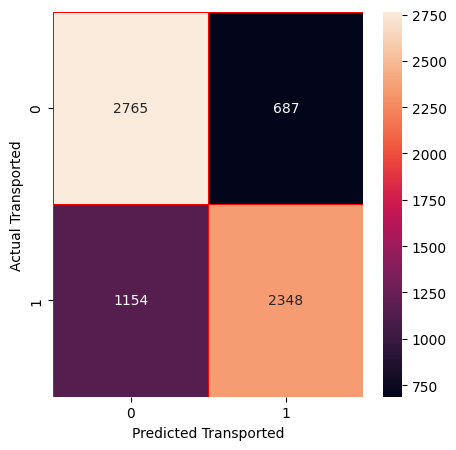

None
Classification report:               precision    recall  f1-score   support

       False       0.71      0.80      0.75      3452
        True       0.77      0.67      0.72      3502

    accuracy                           0.74      6954
   macro avg       0.74      0.74      0.73      6954
weighted avg       0.74      0.74      0.73      6954


============================== KNN Training Model Evaluation ==============================
Cross-validation Mean : 0.7233273381294965

Model Accuracy(Training): 0.8123382226056945

Confusion Matrix :
 


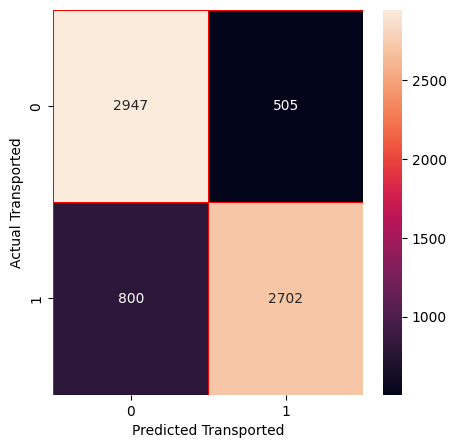

None
Classification report:               precision    recall  f1-score   support

       False       0.79      0.85      0.82      3452
        True       0.84      0.77      0.81      3502

    accuracy                           0.81      6954
   macro avg       0.81      0.81      0.81      6954
weighted avg       0.81      0.81      0.81      6954


============================== Logistic Regression Training Model Evaluation ==============================
Cross-validation Mean : 0.7622990573058795

Model Accuracy(Training): 0.7643083117630141

Confusion Matrix :
 


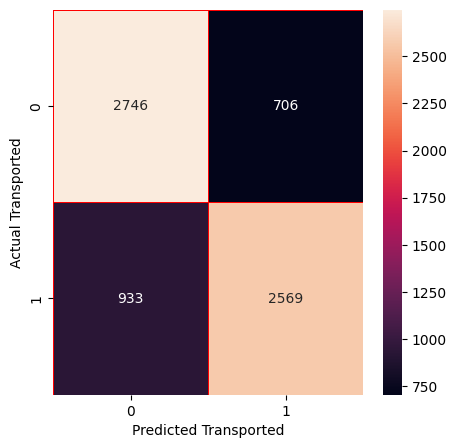

None
Classification report:               precision    recall  f1-score   support

       False       0.75      0.80      0.77      3452
        True       0.78      0.73      0.76      3502

    accuracy                           0.76      6954
   macro avg       0.77      0.76      0.76      6954
weighted avg       0.77      0.76      0.76      6954


============================== Decision Tree Training Model Evaluation ==============================
Cross-validation Mean : 0.751798767882246

Model Accuracy(Training): 0.9995685936151855

Confusion Matrix :
 


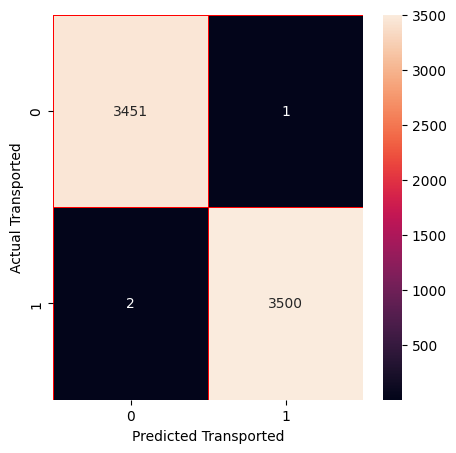

None
Classification report:               precision    recall  f1-score   support

       False       1.00      1.00      1.00      3452
        True       1.00      1.00      1.00      3502

    accuracy                           1.00      6954
   macro avg       1.00      1.00      1.00      6954
weighted avg       1.00      1.00      1.00      6954


============================== Random Forest Training Model Evaluation ==============================
Cross-validation Mean : 0.8041414454643181

Model Accuracy(Training): 0.8838078803566293

Confusion Matrix :
 


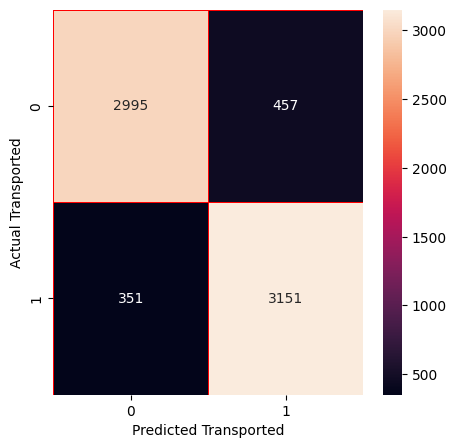

None
Classification report:               precision    recall  f1-score   support

       False       0.90      0.87      0.88      3452
        True       0.87      0.90      0.89      3502

    accuracy                           0.88      6954
   macro avg       0.88      0.88      0.88      6954
weighted avg       0.88      0.88      0.88      6954


============================== AdaBoost Training Model Evaluation ==============================
Cross-validation Mean : 0.7945096336723725

Model Accuracy(Training): 0.8077365545010066

Confusion Matrix :
 


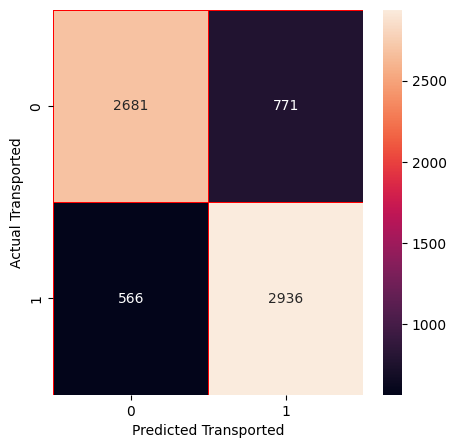

None
Classification report:               precision    recall  f1-score   support

       False       0.83      0.78      0.80      3452
        True       0.79      0.84      0.81      3502

    accuracy                           0.81      6954
   macro avg       0.81      0.81      0.81      6954
weighted avg       0.81      0.81      0.81      6954


============================== XGBoost Training Model Evaluation ==============================
Cross-validation Mean : 0.8044288017861574

Model Accuracy(Training): 0.8455565142364107

Confusion Matrix :
 


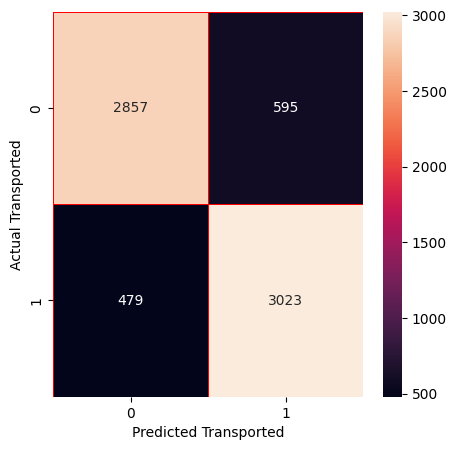

None
Classification report:               precision    recall  f1-score   support

       False       0.86      0.83      0.84      3452
        True       0.84      0.86      0.85      3502

    accuracy                           0.85      6954
   macro avg       0.85      0.85      0.85      6954
weighted avg       0.85      0.85      0.85      6954


============================== Naive Bayes Model Test Results ==============================
Model Accuracy(Testing): 0.7377803335250144
Confusion Matrix :



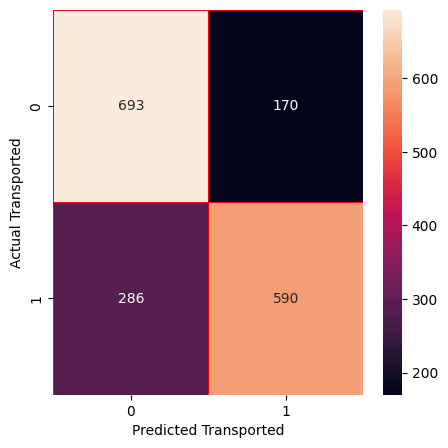

Classification report:               precision    recall  f1-score   support

       False       0.71      0.80      0.75       863
        True       0.78      0.67      0.72       876

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739


============================== KNN Model Test Results ==============================
Model Accuracy(Testing): 0.7435307648073606
Confusion Matrix :



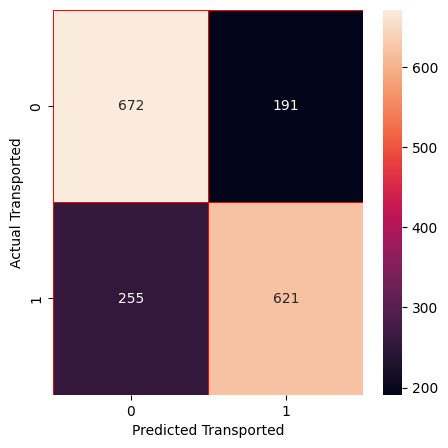

Classification report:               precision    recall  f1-score   support

       False       0.72      0.78      0.75       863
        True       0.76      0.71      0.74       876

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739


============================== Logistic Regression Model Test Results ==============================
Model Accuracy(Testing): 0.7642323174238068
Confusion Matrix :



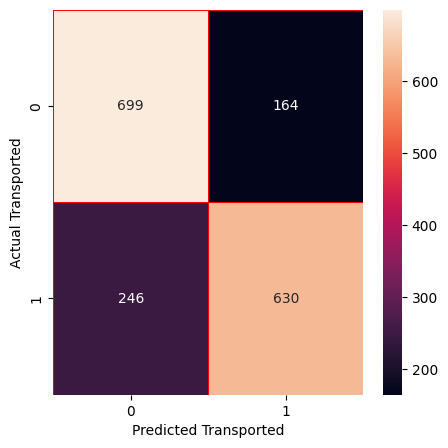

Classification report:               precision    recall  f1-score   support

       False       0.74      0.81      0.77       863
        True       0.79      0.72      0.75       876

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.76      1739
weighted avg       0.77      0.76      0.76      1739


============================== Decision Tree Model Test Results ==============================
Model Accuracy(Testing): 0.745830937320299
Confusion Matrix :



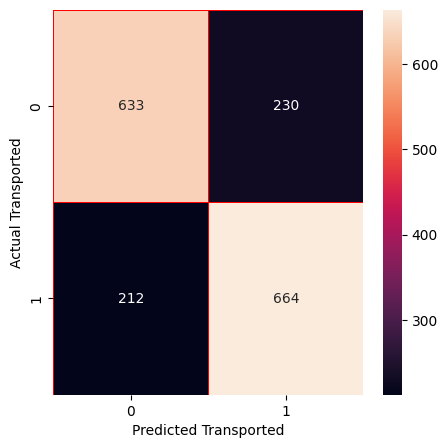

Classification report:               precision    recall  f1-score   support

       False       0.75      0.73      0.74       863
        True       0.74      0.76      0.75       876

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.75      1739
weighted avg       0.75      0.75      0.75      1739


============================== Random Forest Model Test Results ==============================
Model Accuracy(Testing): 0.8021851638872916
Confusion Matrix :



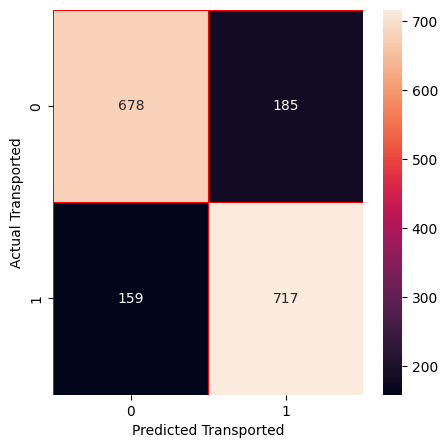

Classification report:               precision    recall  f1-score   support

       False       0.81      0.79      0.80       863
        True       0.79      0.82      0.81       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739


============================== AdaBoost Model Test Results ==============================
Model Accuracy(Testing): 0.7964347326049454
Confusion Matrix :



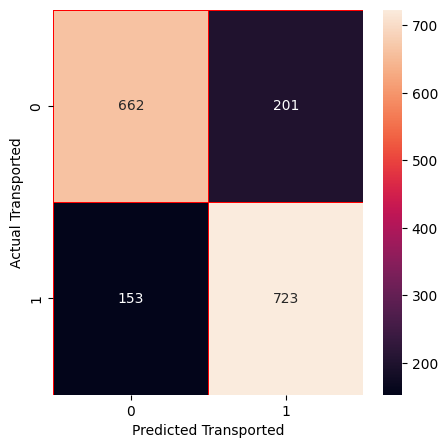

Classification report:               precision    recall  f1-score   support

       False       0.81      0.77      0.79       863
        True       0.78      0.83      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739


============================== XGBoost Model Test Results ==============================
Model Accuracy(Testing): 0.8159861989649224
Confusion Matrix :



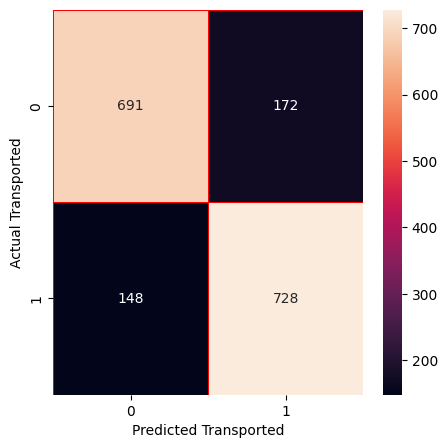

Classification report:               precision    recall  f1-score   support

       False       0.82      0.80      0.81       863
        True       0.81      0.83      0.82       876

    accuracy                           0.82      1739
   macro avg       0.82      0.82      0.82      1739
weighted avg       0.82      0.82      0.82      1739




In [115]:
pipeline(df_train, df_test)

# Saving the best model in pickle


In [103]:
def create_submission_dataframe(y_test_pred, passenger_ids, threshold = 0.5):
    # Convert probabilities to binary outputs
    y_test_pred_binary = (y_test_pred > threshold).astype(int).flatten()

    # Create a DataFrame for submission
    submission_df = pd.DataFrame(
        {"PassengerId": passenger_ids, "Transported": y_test_pred_binary}
    )

    return submission_df